In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

import datetime
import os

pio.renderers.default = 'jupyterlab'
%matplotlib inline
matplotlib.rcParams['font.family'] = ['Ubuntu', 'sans-fantasy']

In [2]:
path = '/home/khavlaren/FastFourierTransform/tests/final/'
path_logs = '/home/khavlaren/FastFourierTransform/tests/logs-csv/'

In [3]:
!ls ~/FastFourierTransform/tests/final

Hard.csv  Light.csv  NoOpenMP.csv  OpenMP.csv


In [4]:
!ls /home/khavlaren/FastFourierTransform/tests/logs-csv/

mem-log-fftHard.csv   mem-log-noOpenMP.csv  mem-log-openMP-2.csv
mem-log-fftLight.csv  mem-log-openMP-1.csv


In [5]:
def transform(filename, num_of_cores):
    f = pd.read_csv(path + filename).T
    f.columns = 32 * 2**np.arange(len(f.columns))
    f = pd.melt(f)
    f.columns = ['size', 'time']
    f['cores'] = num_of_cores
    return f

In [6]:
def get_ready(files):
    dfs = [transform(filename, num_of_cores) 
           for filename, num_of_cores in files]
    return pd.concat(dfs, ignore_index=True)

In [7]:
def get_df(filename):
    df = pd.read_csv(path + filename)
    df.cores = df.cores.astype('str')
    return df

In [8]:
openmp = get_df('OpenMP.csv')
noopenmp = get_df('NoOpenMP.csv')
light = get_df('Light.csv')
hard = get_df('Hard.csv')

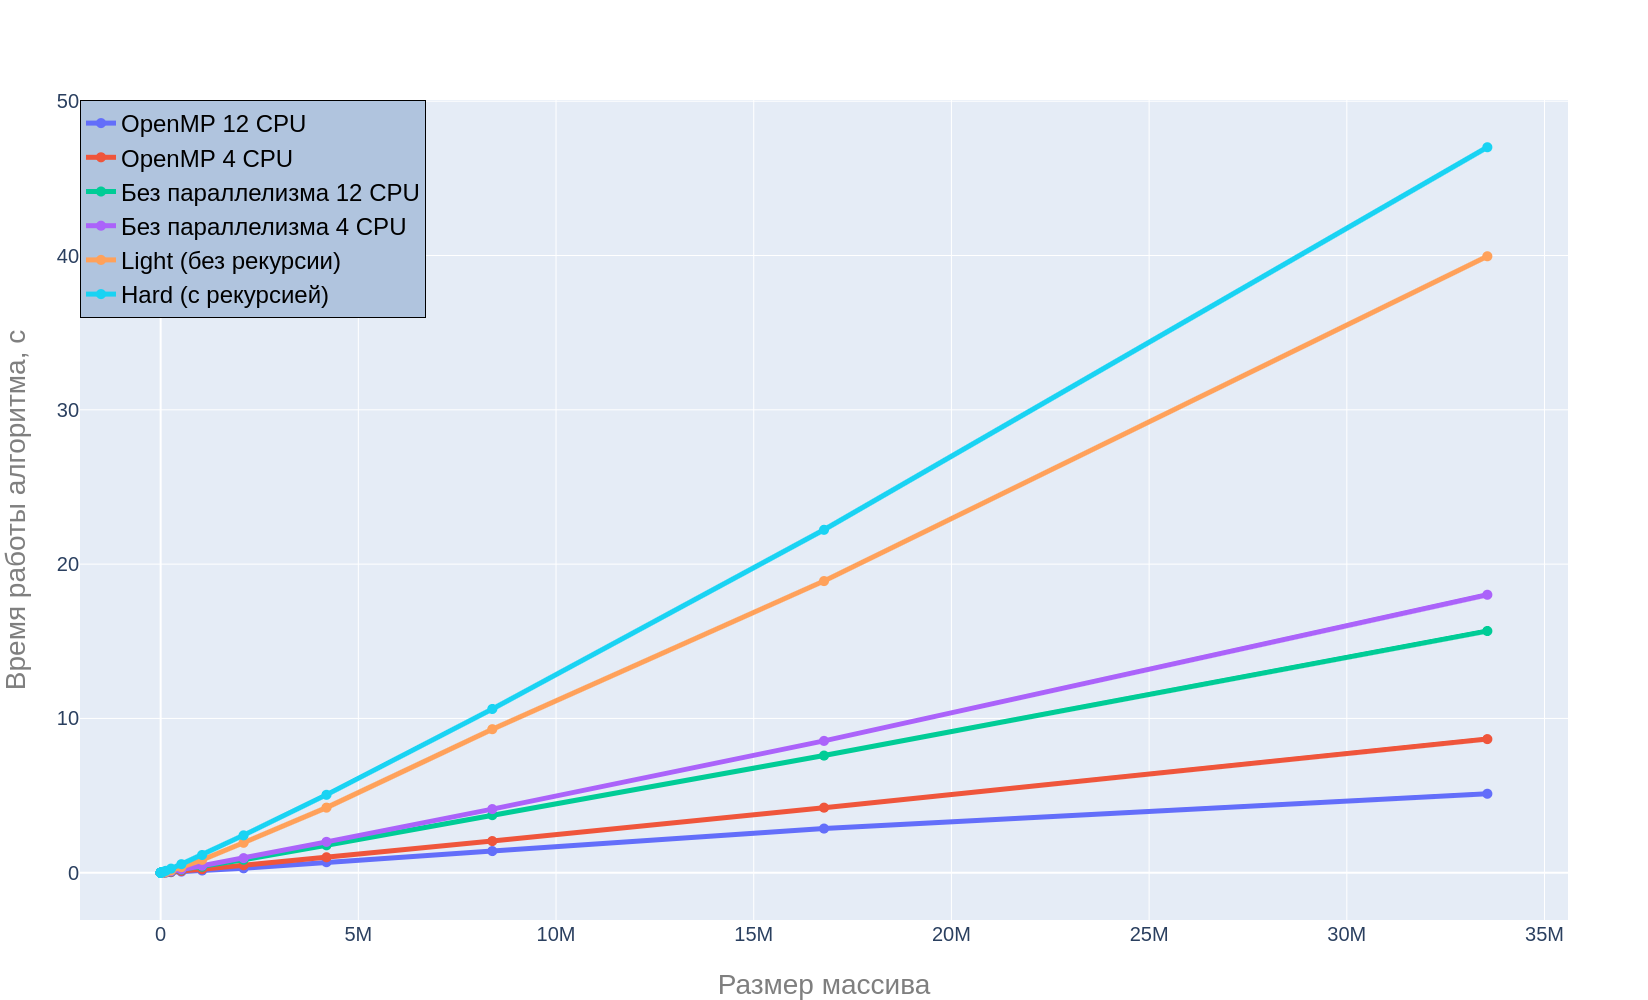

In [9]:
op4 = openmp[openmp.cores == '4'].groupby('size')['time'].median() / 10**6
nop4 = noopenmp[noopenmp.cores == '4'].groupby('size')['time'].median() / 10**6
op12 = openmp[openmp.cores == '12'].groupby('size')['time'].median() / 10**6
nop12 = noopenmp[noopenmp.cores == '12'].groupby('size')['time'].median() / 10**6
lg = light.groupby('size')['time'].median() / 10**6
hd = hard.groupby('size')['time'].median() / 10**6

fig = go.Figure()
fig.add_trace(go.Scatter(x=op12.index, y=op12,
                    mode='lines+markers',
                    name='OpenMP 12 CPU', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=op4.index, y=op4,
                    mode='lines+markers',
                    name='OpenMP 4 CPU', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=nop12.index, y=nop12,
                    mode='lines+markers',
                    name='Без параллелизма 12 CPU', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=nop4.index, y=nop4,
                    mode='lines+markers',
                    name='Без параллелизма 4 CPU', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=lg.index, y=lg,
                    mode='lines+markers',
                    name='Light (без рекурсии)', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=hd.index, y=hd,
                    mode='lines+markers',
                    name='Hard (с рекурсией)', 
                    line=dict(width=5), marker=dict(size=10)))
fig.update_layout(height=1000, 
                  legend=go.layout.Legend(x=0, y=1, traceorder="normal", 
                                          font=dict(size=24, color="black"), 
                                          bgcolor="LightSteelBlue", 
                                          bordercolor="Black",
                                          borderwidth=1),
                 yaxis=go.layout.YAxis(
                    title=go.layout.yaxis.Title(
                        text='Время работы алгоритма, с',
                        font=dict(size=28, color='#7f7f7f'))),
                 xaxis=go.layout.XAxis(
                    title=go.layout.xaxis.Title(
                        text='Размер массива',
                        font=dict(size=28, color='#7f7f7f'))))
fig.update_xaxes(tickfont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=20))
fig.show()

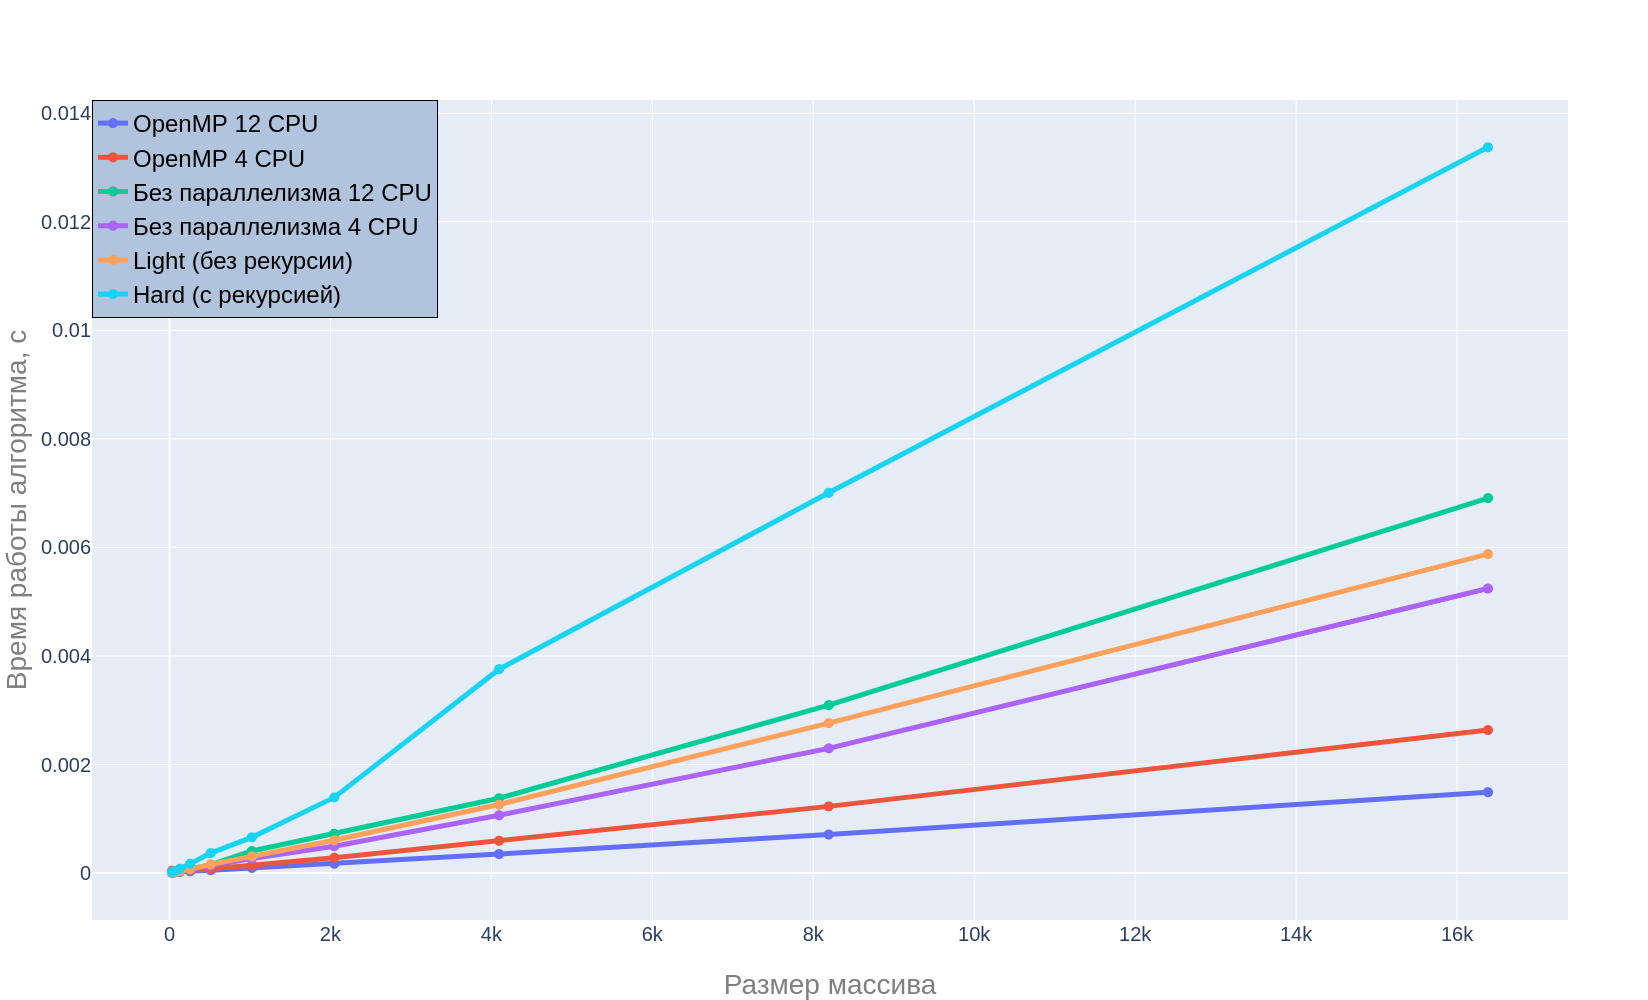

In [10]:
op4 = openmp[openmp.cores == '4'].groupby('size')['time'].median().iloc[:10] / 10**6
nop4 = noopenmp[noopenmp.cores == '4'].groupby('size')['time'].median().iloc[:10] / 10**6
op12 = openmp[openmp.cores == '12'].groupby('size')['time'].median().iloc[:10] / 10**6
nop12 = noopenmp[noopenmp.cores == '12'].groupby('size')['time'].median().iloc[:10] / 10**6
lg = light.groupby('size')['time'].median().iloc[:10] / 10**6
hd = hard.groupby('size')['time'].median().iloc[:10] / 10**6

fig = go.Figure()
fig.add_trace(go.Scatter(x=op12.index, y=op12,
                    mode='lines+markers',
                    name='OpenMP 12 CPU', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=op4.index, y=op4,
                    mode='lines+markers',
                    name='OpenMP 4 CPU', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=nop12.index, y=nop12,
                    mode='lines+markers',
                    name='Без параллелизма 12 CPU', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=nop4.index, y=nop4,
                    mode='lines+markers',
                    name='Без параллелизма 4 CPU', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=lg.index, y=lg,
                    mode='lines+markers',
                    name='Light (без рекурсии)', 
                    line=dict(width=5), marker=dict(size=10)))
fig.add_trace(go.Scatter(x=hd.index, y=hd,
                    mode='lines+markers',
                    name='Hard (с рекурсией)', 
                    line=dict(width=5), marker=dict(size=10)))
fig.update_layout(height=1000, 
                  legend=go.layout.Legend(x=0, y=1, traceorder="normal", 
                                          font=dict(size=24, color="black"), 
                                          bgcolor="LightSteelBlue", 
                                          bordercolor="Black",
                                          borderwidth=1),
                 yaxis=go.layout.YAxis(
                    title=go.layout.yaxis.Title(
                        text='Время работы алгоритма, с',
                        font=dict(size=28, color='#7f7f7f'))),
                 xaxis=go.layout.XAxis(
                    title=go.layout.xaxis.Title(
                        text='Размер массива',
                        font=dict(size=28, color='#7f7f7f'))))
fig.update_xaxes(tickfont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=20))
fig.show()

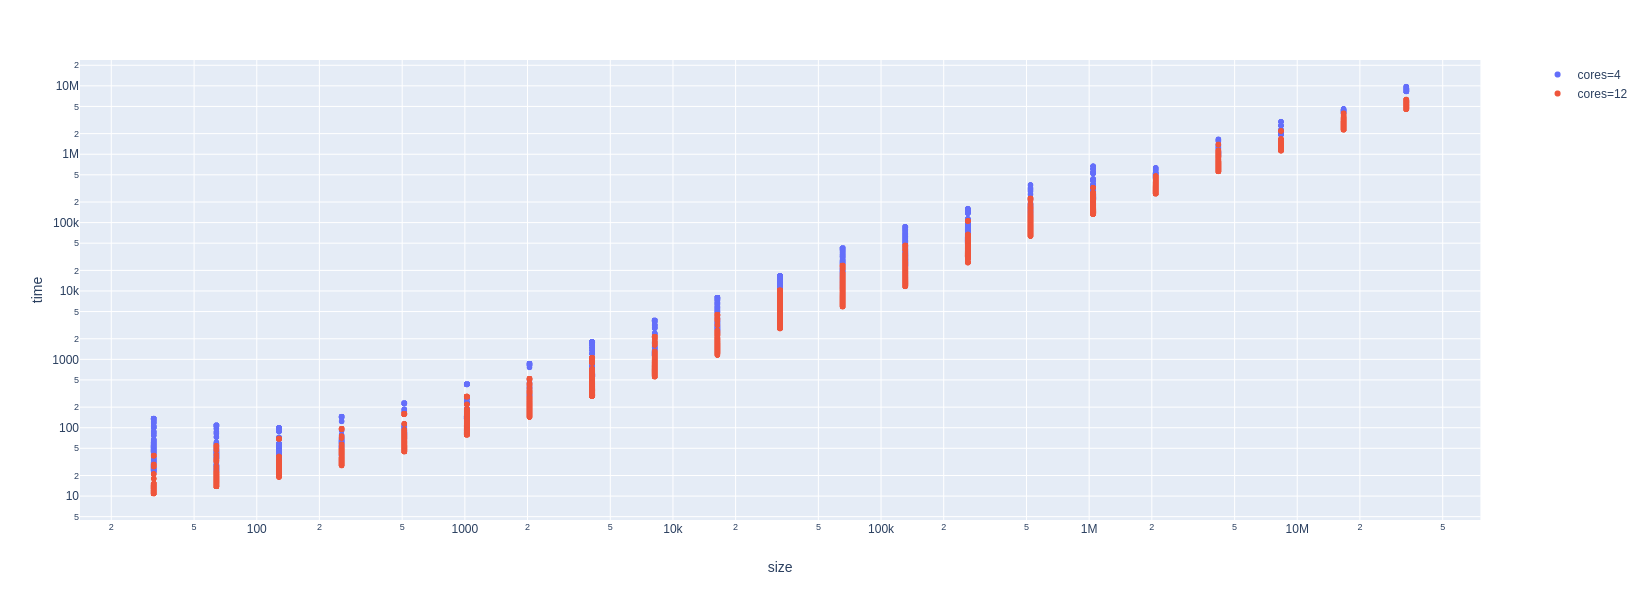

In [11]:
fig = px.scatter(openmp, 
                 x='size', y='time', color='cores',
                 hover_name='size', log_x=True, log_y=True, size_max=60)
fig.show()

In [12]:
def plot_result(df, name):
    
    plt.figure(figsize=(24, 24))
    plt.subplot(2, 1, 1)
    sns.barplot(x='size', y='time', hue='cores', data=df, estimator=np.median)
    plt.xticks(size=14, rotation=45)
    plt.yticks(size=14)
    plt.xlabel('')
    plt.ylabel('Время работы, мкс', size=16)
    plt.legend(fontsize=16, title='Число CPU', title_fontsize=18)
    plt.title(f'Реализация {name}, линейная y-шкала', size=24)

    plt.subplot(2, 1, 2, aspect='equal')
    g = sns.barplot(x='size', y='time', hue='cores', data=df, estimator=np.median)
    g.set_yscale("log")
    plt.xticks(size=14, rotation=45)
    plt.yticks(size=14)
    plt.xlabel('Длина массива', size=16)
    plt.ylabel('Время работы, мкс', size=16)
    plt.title(f'Реализация {name}, логарифмическая y-шкала', size=24)
    plt.legend(fontsize=16, title='Число CPU', title_fontsize=18)
    plt.show()

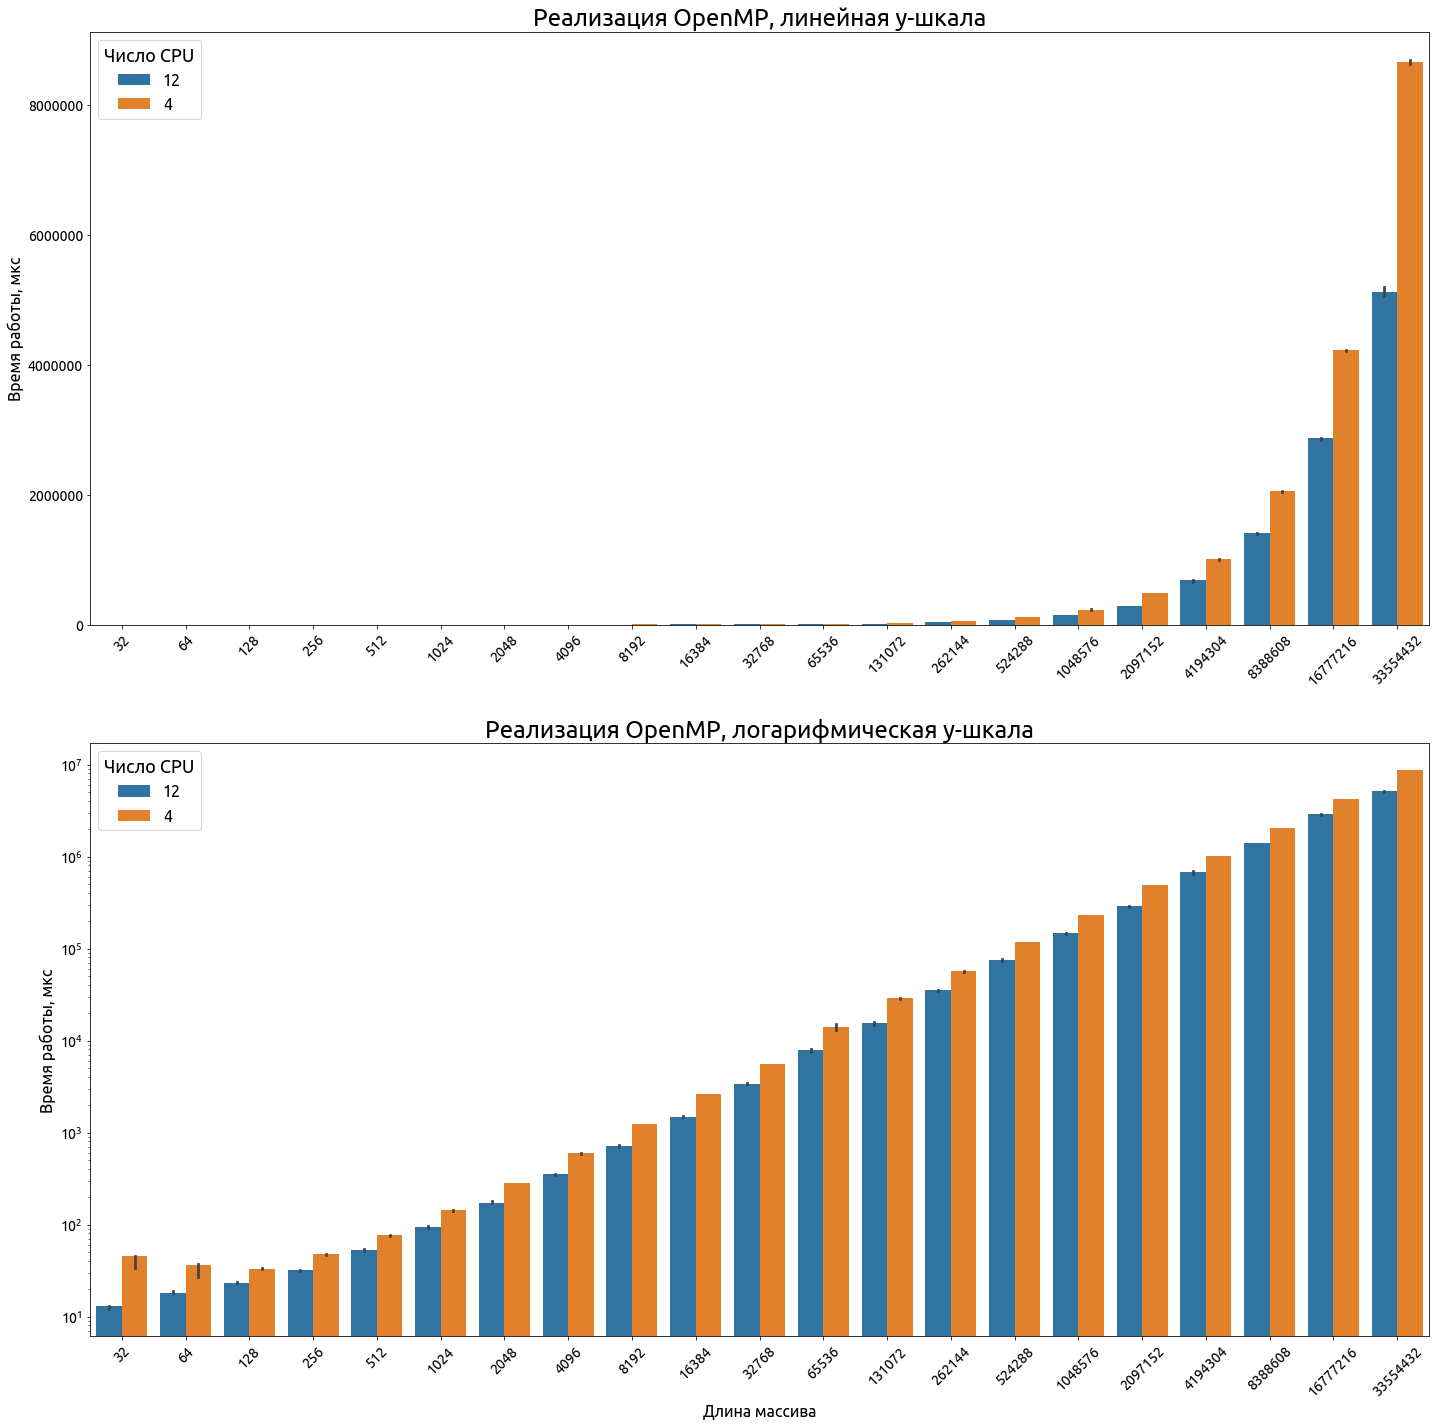

In [13]:
plot_result(openmp, 'OpenMP')

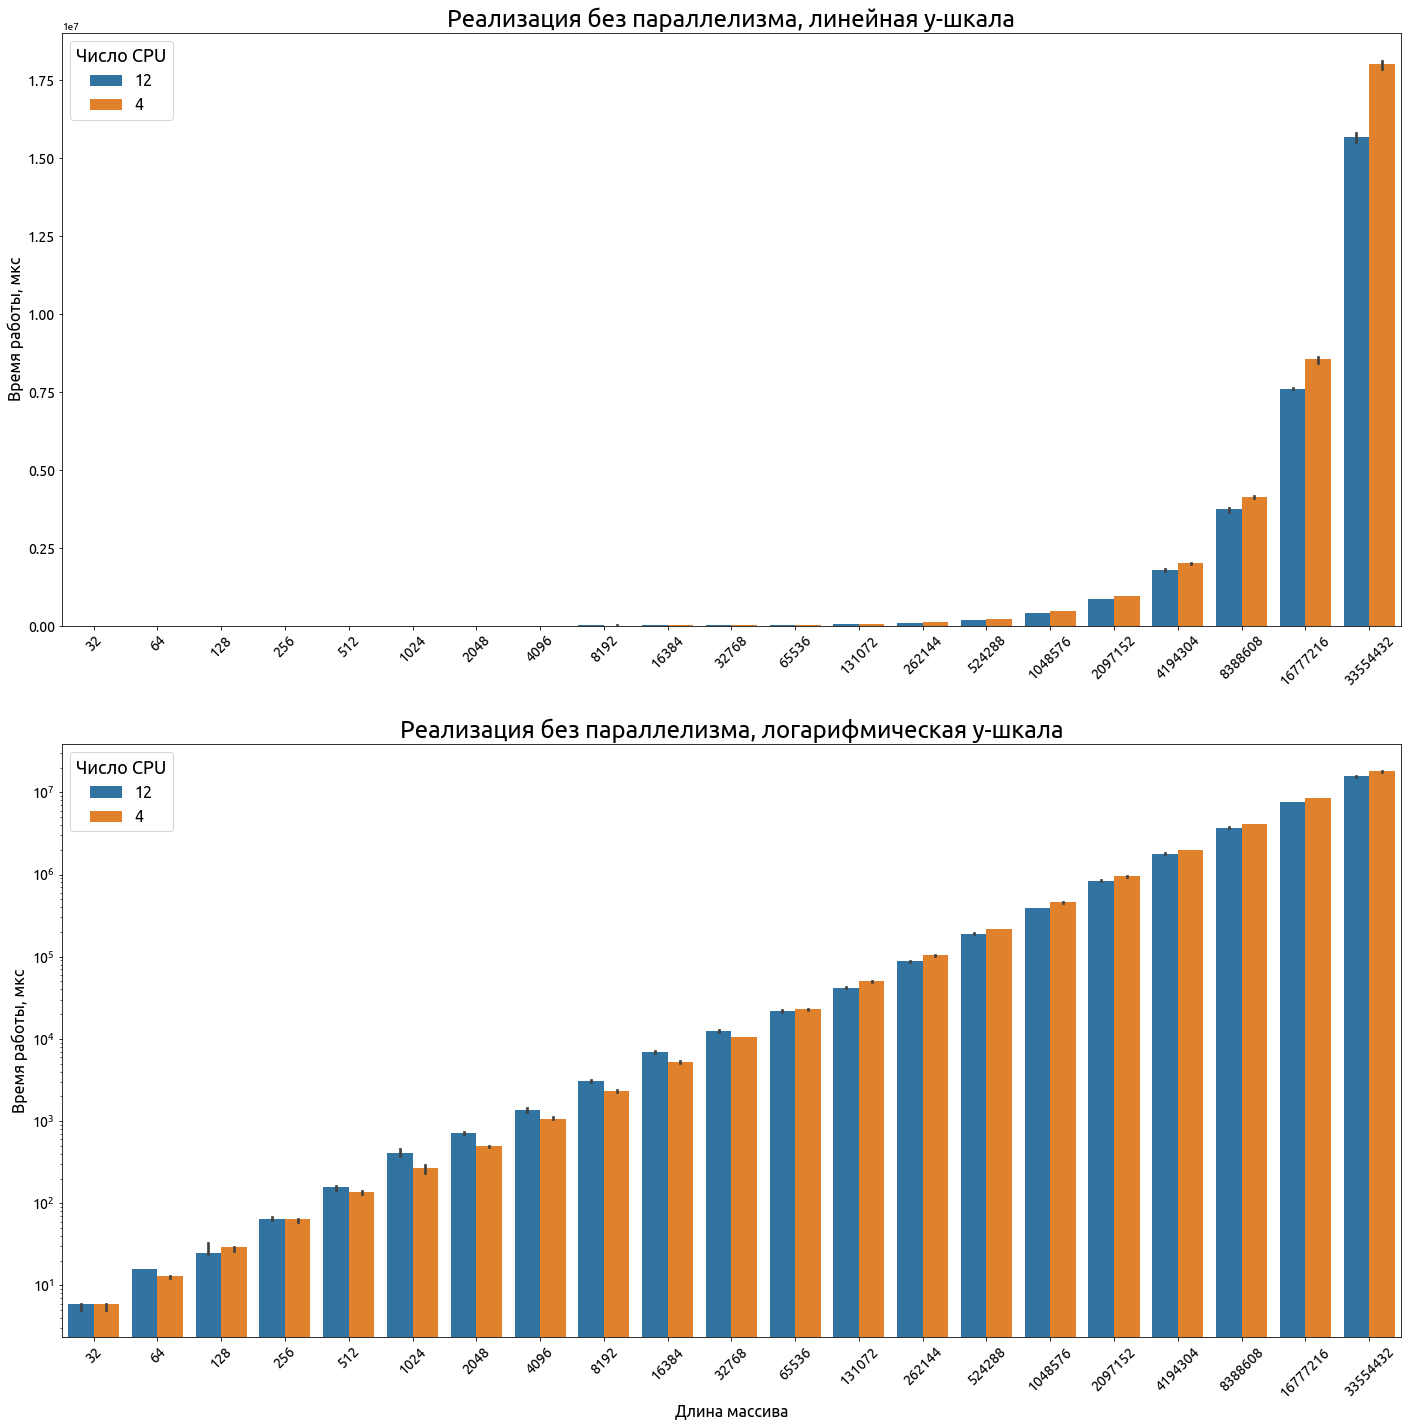

In [14]:
plot_result(noopenmp, 'без параллелизма')

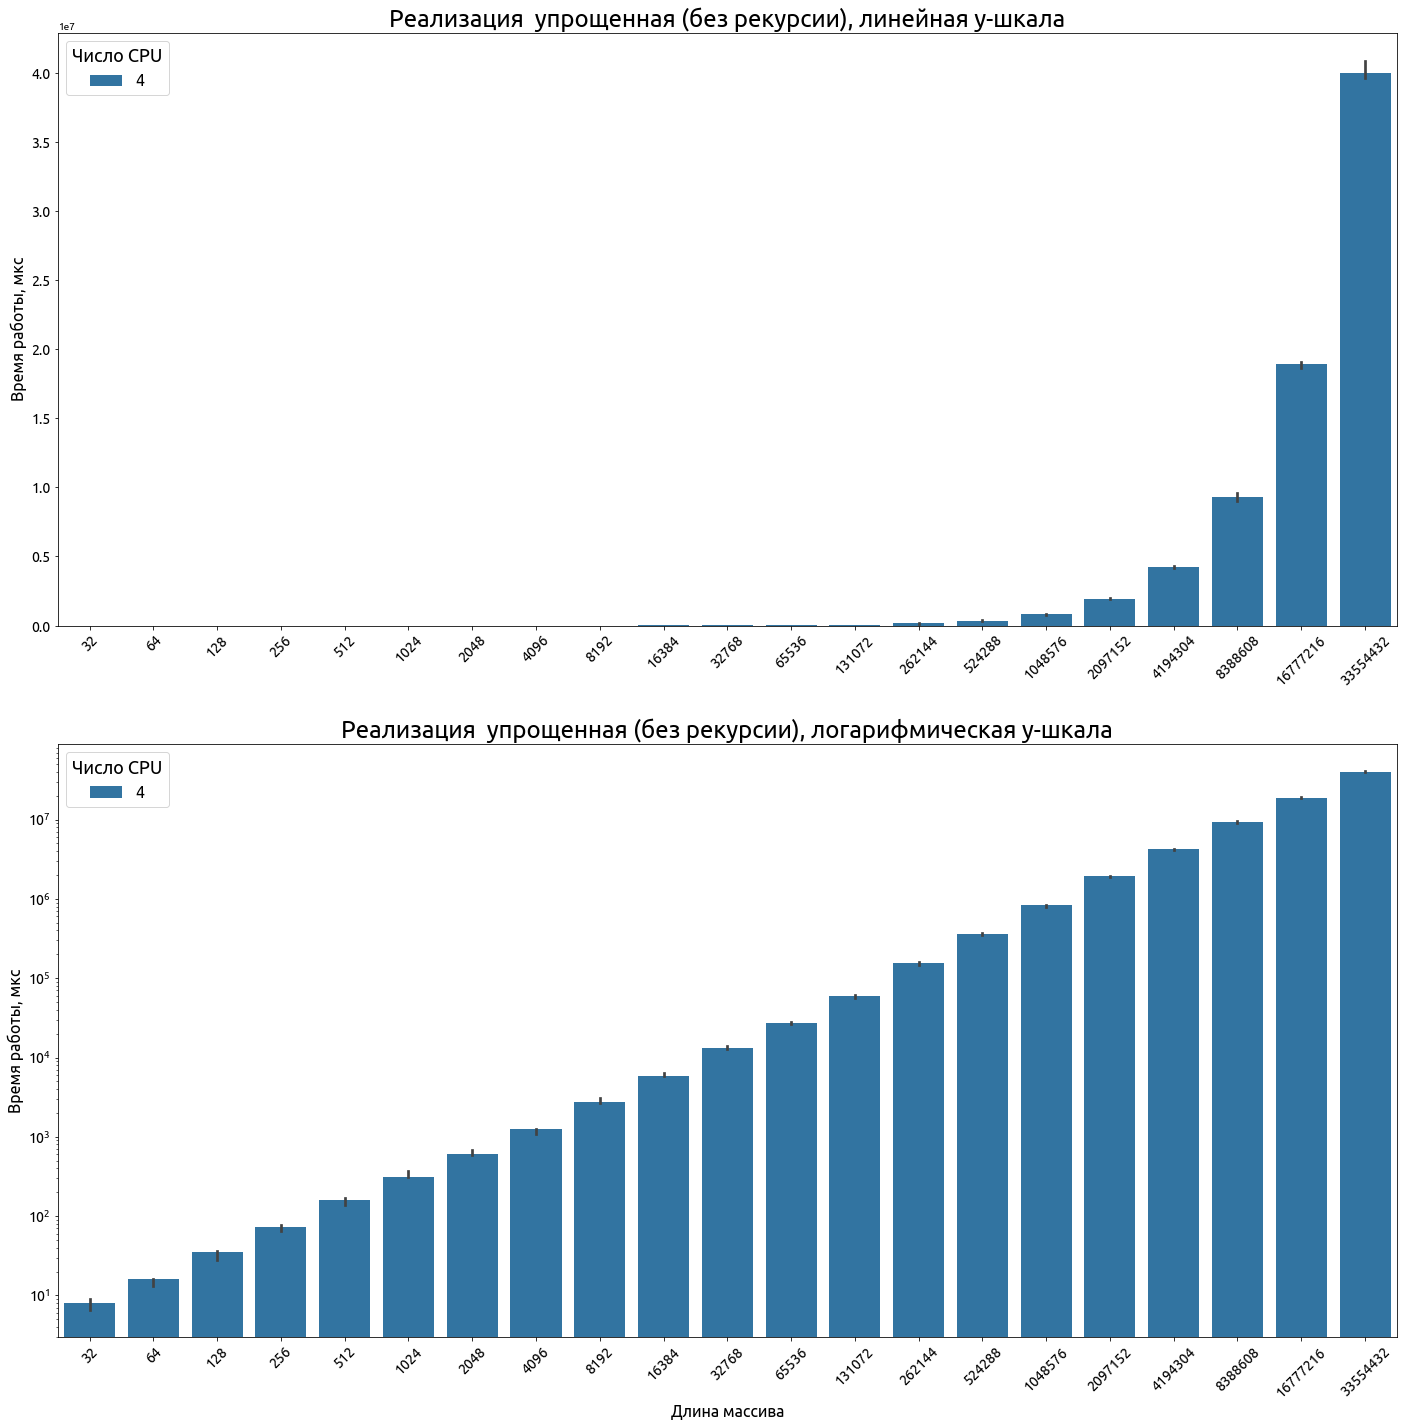

In [15]:
plot_result(light, ' упрощенная (без рекурсии)')

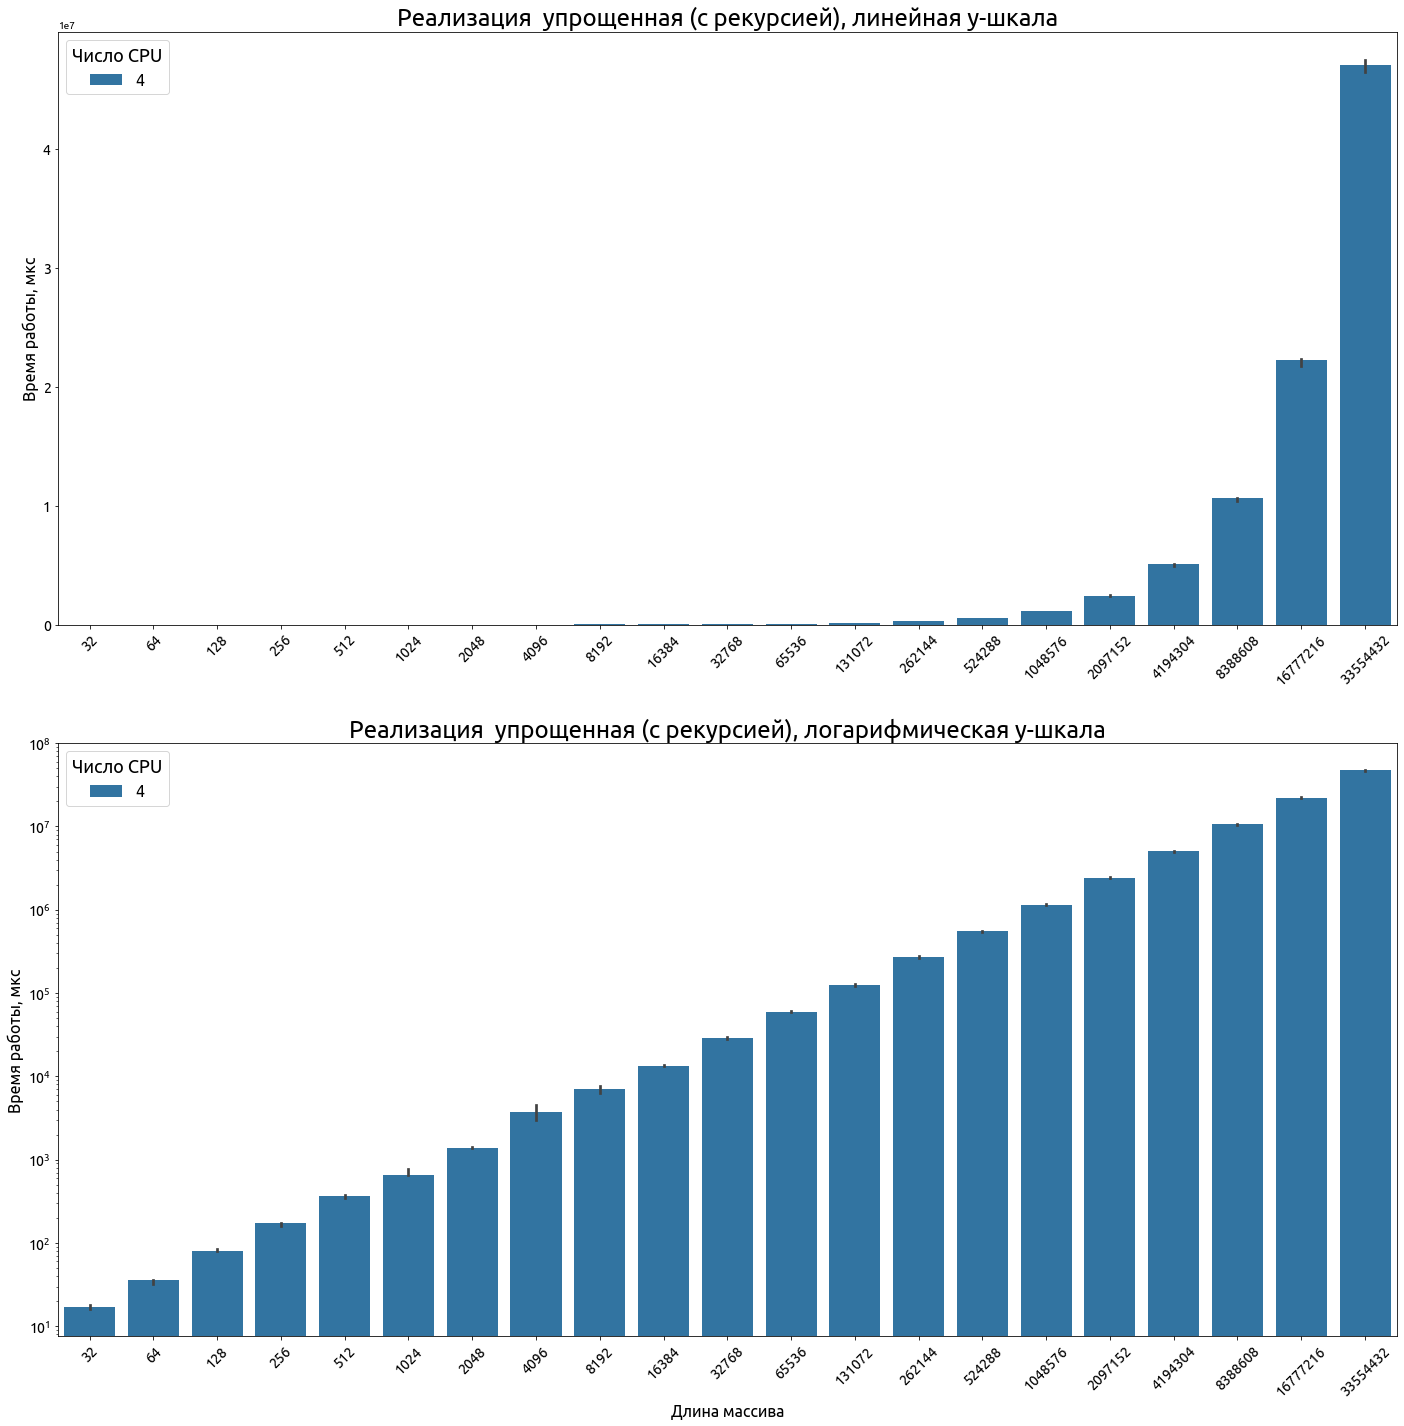

In [16]:
plot_result(hard, ' упрощенная (с рекурсией)')

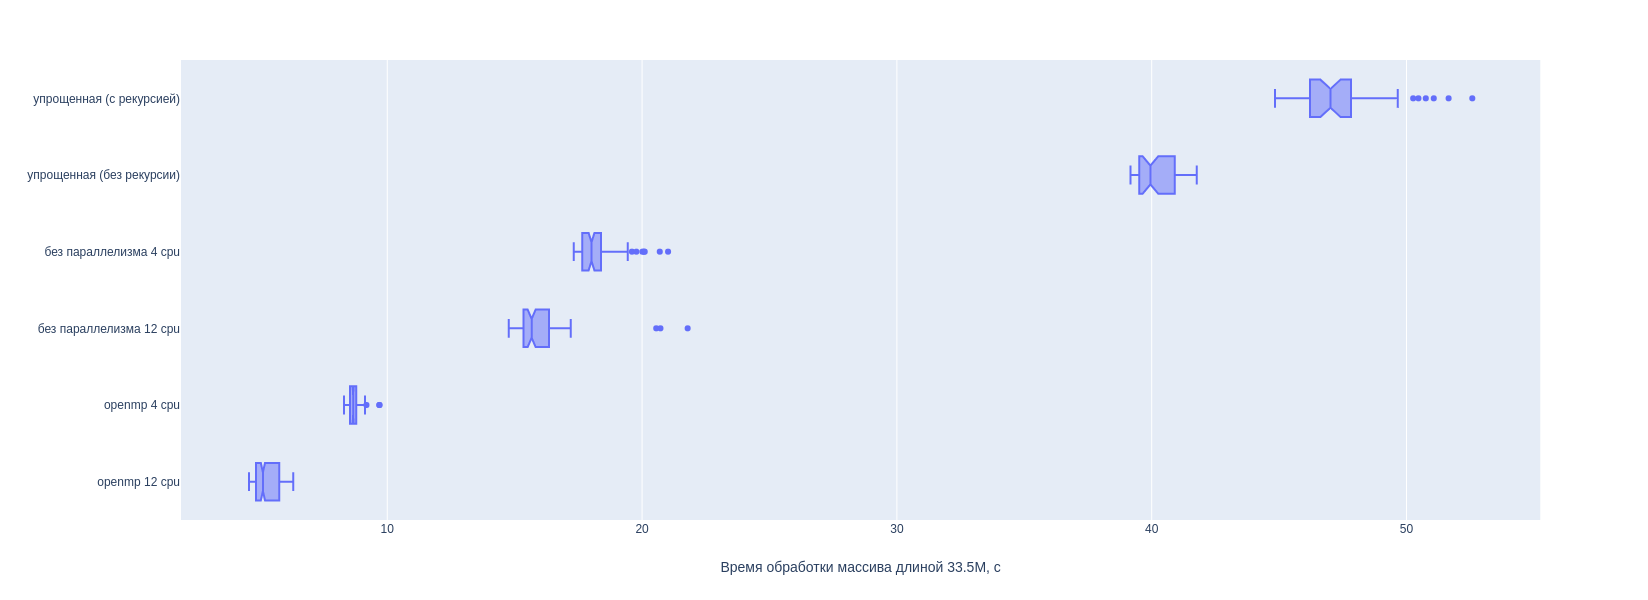

In [17]:
max_size = 1024*1024*32
op4 = openmp[(openmp['size'] == max_size) & (openmp['cores'] == '4')]
op12 = openmp[(openmp['size'] == max_size) & (openmp['cores'] == '12')]
nop4 = noopenmp[(noopenmp['size'] == max_size) & (noopenmp['cores'] == '4')]
nop12 = noopenmp[(noopenmp['size'] == max_size) & (noopenmp['cores'] == '12')]
lg = light[light['size'] == max_size]
hd = hard[hard['size'] == max_size]

df = pd.DataFrame({
    'openmp 12 cpu': op12.time,
    'openmp 4 cpu': op4.time,
    'без параллелизма 12 cpu': nop12.time,
    'без параллелизма 4 cpu': nop4.time,
    'упрощенная (без рекурсии)': lg.time,
    'упрощенная (с рекурсией)': hd.time
})
df = df.melt().dropna()
df.columns = ['method', 'time']
df.time /= 10**6

fig = px.box(df, x='time', y='method', notched=True,
             width=1600, height=600, orientation='h', 
             hover_name='method', 
             labels={'time': 'Время обработки массива длиной 33.5M, с', 'method': ''})
fig.show()

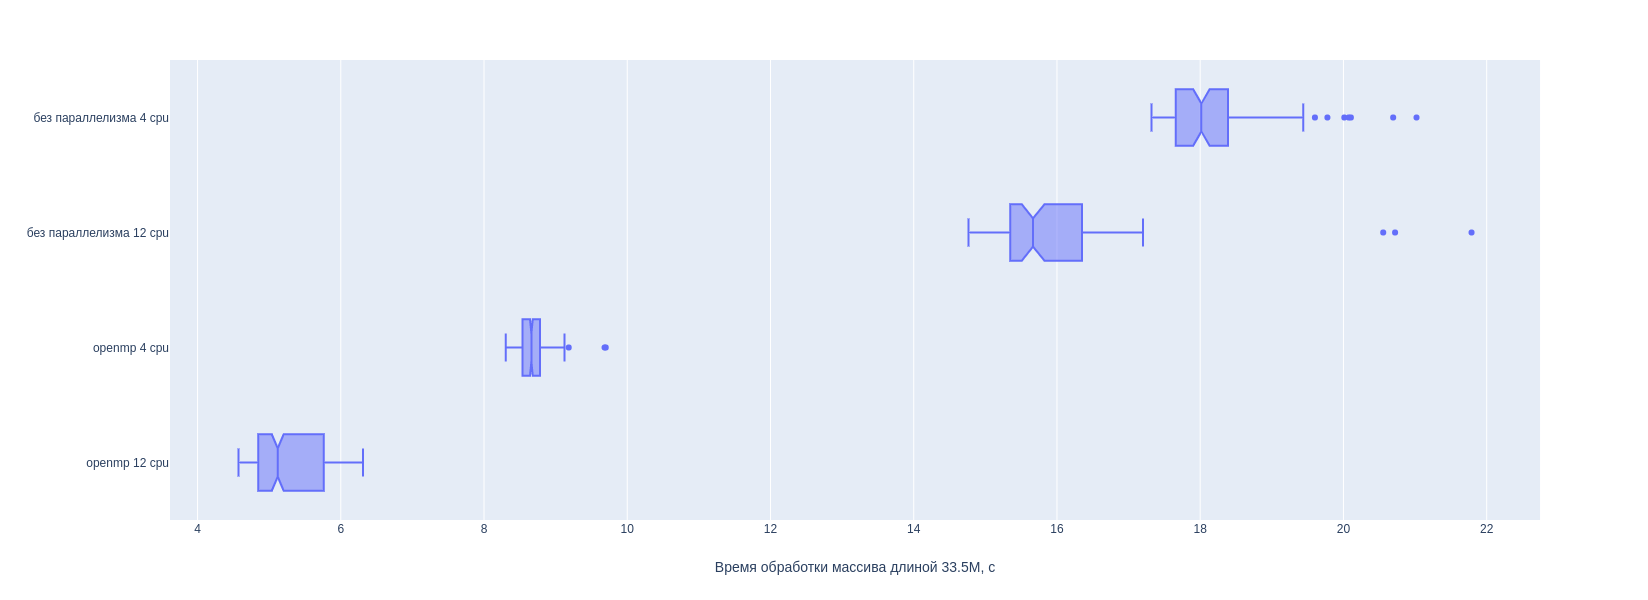

In [18]:
df = pd.DataFrame({
    'openmp 12 cpu': op12.time,
    'openmp 4 cpu': op4.time,
    'без параллелизма 12 cpu': nop12.time,
    'без параллелизма 4 cpu': nop4.time
})
df = df.melt().dropna()
df.columns = ['method', 'time']
df.time /= 10**6

fig = px.box(df, x='time', y='method', notched=True,
             width=1600, height=600, orientation='h', 
             hover_name='method', 
             labels={'time': 'Время обработки массива длиной 33.5M, с', 'method': ''})
fig.show()

In [19]:
op_gb = openmp.groupby(['size', 'cores'])
op_gb['time'].describe()

count          mean            std        min         25%  \
size     cores                                                              
32       12     300.0  1.294000e+01       3.304461       11.0       11.00   
         4      400.0  4.526750e+01      25.779690       23.0       27.00   
64       12     300.0  1.909667e+01       5.750730       14.0       17.00   
         4      400.0  3.694500e+01      18.941857       23.0       25.00   
128      12     300.0  2.446000e+01       6.305097       19.0       22.00   
         4      400.0  3.750000e+01      14.863624       24.0       31.00   
256      12     300.0  3.579667e+01      11.597860       28.0       30.00   
         4      400.0  5.068750e+01      16.790911       40.0       44.00   
512      12     300.0  6.298333e+01      27.497699       45.0       49.00   
         4      400.0  7.971250e+01      24.404278       70.0       71.00   
1024     12     300.0  1.067800e+02      43.057536       79.0       84.75   
         4      400.0  1.577175e+02      64.522248      134.0      136.00   
2048     12     300.0  2.044933e+02      83.844955      144.0      156.00   
         4      400.0  3.429425e+02     173.310431      268.0      270.00   
4096     12     300.0  3.977933e+02     168.230861      292.0      305.75   
         4      400.0  6.572300e+02     263.418765      560.0      573.00   
8192     12     300.0  8.236867e+02     344.476097      560.0      657.75   
         4      400.0  1.545630e+03     796.598356     1157.0     1184.00   
16384    12     300.0  1.728697e+03     692.388164     1160.0     1395.00   
         4      400.0  3.422800e+03    1745.835553     2468.0     2549.00   
32768    12     300.0  4.134087e+03    1729.464400     2826.0     3090.25   
         4      400.0  7.346333e+03    3382.559373     5164.0     5359.25   
65536    12     300.0  1.004247e+04    5010.794866     5911.0     6661.00   
         4      400.0  1.815396e+04    9261.627009    11013.0    11693.75   
131072   12     300.0  1.794629e+04    7284.036952    11703.0    13167.00   
         4      400.0  3.307092e+04   12985.456784    23306.0    24634.50   
262144   12     300.0  3.785018e+04    8701.988563    25931.0    32941.50   
         4      400.0  6.035772e+04   13185.009255    49098.0    53444.75   
524288   12     300.0  8.551126e+04   29209.210720    63794.0    70118.75   
         4      400.0  1.260045e+05   28089.690178   104386.0   113091.75   
1048576  12     300.0  1.562600e+05   25368.309152   133774.0   141602.25   
         4      400.0  2.421103e+05   45013.605292   214407.0   224234.50   
2097152  12     300.0  3.036809e+05   39258.685781   265720.0   277705.50   
         4      400.0  4.883296e+05   19972.949895   444833.0   473478.50   
4194304  12     300.0  6.800538e+05  108106.126418   563302.0   596094.25   
         4      400.0  1.012731e+06   65663.551584   937695.0   988586.25   
8388608  12     300.0  1.398030e+06   64431.277297  1127597.0  1378191.50   
         4      400.0  2.055868e+06   72884.851190  1933313.0  2014666.75   
16777216 12     300.0  2.759065e+06  267180.572172  2291408.0  2493481.25   
         4      400.0  4.217252e+06   76447.665712  4056694.0  4151462.00   
33554432 12     300.0  5.257887e+06  465912.777256  4571893.0  4848169.75   
         4      400.0  8.661313e+06  168227.411344  8302603.0  8536502.00   

                      50%         75%        max  
size     cores                                    
32       12          13.0       13.00       39.0  
         4           45.0       52.00      135.0  
64       12          18.0       20.00       54.0  
         4           36.5       40.00      108.0  
128      12          23.0       26.00       69.0  
         4           33.0       44.00       99.0  
256      12          32.0       36.00       96.0  
         4           48.0       51.00      144.0  
512      12          53.0       63.00      159.0  
         4           76.0       77.00      228.0  
1024     12    

In [20]:
nop_gb = noopenmp.groupby(['size', 'cores'])
nop_gb['time'].describe()

count         mean           std         min          25%  \
size     cores                                                              
32       12     100.0        57.00  5.141419e+02         5.0         5.00   
         4      100.0         6.74  7.661553e+00         5.0         5.00   
64       12     100.0        16.56  2.421787e+00        14.0        15.00   
         4      100.0        12.99  1.226764e+00        12.0        12.00   
128      12     100.0        30.02  8.241286e+00        21.0        23.00   
         4      100.0        27.79  1.854805e+00        26.0        26.00   
256      12     100.0        67.52  1.677268e+01        42.0        53.00   
         4      100.0        62.66  9.840362e+00        59.0        59.00   
512      12     100.0       253.26  5.223632e+02        97.0       133.00   
         4      100.0       215.33  7.899920e+02       102.0       130.00   
1024     12     100.0       543.29  1.221640e+03       238.0       337.25   
         4      100.0       268.08  4.911267e+01       211.0       228.50   
2048     12     100.0       724.77  1.119062e+02       481.0       669.50   
         4      100.0       543.59  9.983158e+01       454.0       464.00   
4096     12     100.0      1425.12  3.391864e+02       969.0      1193.00   
         4      100.0      1187.75  2.384198e+02       986.0      1020.75   
8192     12     100.0      3166.00  5.111837e+02      2175.0      2936.50   
         4      100.0      2577.57  5.526585e+02      2116.0      2233.00   
16384    12     100.0      7183.87  1.030933e+03      5179.0      6450.25   
         4      100.0      5673.68  1.073617e+03      4635.0      4974.25   
32768    12     100.0     12511.23  1.584828e+03      9832.0     11618.75   
         4      100.0     10691.44  7.502373e+02      9858.0     10165.00   
65536    12     100.0     22101.98  2.209978e+03     18580.0     20546.25   
         4      100.0     23198.90  1.664598e+03     21245.0     22276.00   
131072   12     100.0     43049.84  3.898302e+03     39088.0     40701.00   
         4      100.0     51775.66  5.311379e+03     47264.0     48861.75   
262144   12     100.0     88388.60  3.862858e+03     82559.0     85053.25   
         4      100.0    105678.46  5.856727e+03     97589.0    101658.75   
524288   12     100.0    193764.61  1.093317e+04    175731.0    186736.75   
         4      100.0    215816.26  5.560435e+03    206436.0    210836.75   
1048576  12     100.0    393949.11  1.760635e+04    370999.0    379542.25   
         4      100.0    458962.18  1.772904e+04    439120.0    447693.25   
2097152  12     100.0    846576.65  2.408069e+04    780113.0    832171.50   
         4      100.0    943779.94  1.845711e+04    913042.0    925237.00   
4194304  12     100.0   1791021.84  4.179444e+04   1695696.0   1754618.00   
         4      100.0   1999470.11  4.770804e+04   1928132.0   1956372.25   
8388608  12     100.0   3709365.57  7.131697e+04   3623249.0   3637735.75   
         4      100.0   4119796.61  9.986514e+04   3974562.0   4030606.50   
16777216 12     100.0   7606895.82  2.475302e+05   7104753.0   7444832.25   
         4      100.0   8520865.49  1.406214e+05   8321398.0   8390484.00   
33554432 12     100.0  15911232.39  1.103884e+06  14763622.0  15358104.75   
         4      100.0  18157748.20  7.284015e+05  17320691.0  17657906.50   

                       50%          75%         max  
size     cores                                       
32       12            6.0         6.00      5147.0  
         4             6.0         6.00        79.0  
64       12           16.0        17.00        33.0  
         4            13.0        13.00        17.0  
128      12           25.0        37.00        54.0  
         4            29.0        29.00        36.0  
256      12           65.0        70.25       108.0  
         4            64.0        64.00       156.0  
512      12          156.0       187.00      4318.0  
         4           139.0       

In [21]:
lg_gb = light.groupby('size')
lg_gb['time'].describe()

count         mean            std         min          25%  \
size                                                                   
32         50.0         7.94       2.485961         6.0         6.00   
64         50.0        14.92       3.281612        12.0        13.00   
128        50.0        32.18       3.983076        28.0        28.00   
256        50.0        71.30       7.833080        63.0        63.00   
512        50.0       155.32      15.017595       140.0       140.00   
1024       50.0       317.10      46.810626       224.0       307.00   
2048       50.0       636.72     110.839844       499.0       527.00   
4096       50.0      1271.90     224.519101      1067.0      1080.50   
8192       50.0      2905.06     480.929347      2327.0      2429.25   
16384      50.0      6270.02    1035.615906      5053.0      5388.50   
32768      50.0     13719.84    2132.321800     11153.0     12540.00   
65536      50.0     27307.52    2381.482776     23857.0     25458.00   
131072     50.0     59258.84    3882.264516     53231.0     56156.75   
262144     50.0    152988.76    7632.692420    143346.0    145351.25   
524288     50.0    362139.82   13184.069010    343449.0    349047.00   
1048576    50.0    821262.18   26763.057037    786177.0    795201.25   
2097152    50.0   1936755.30   50570.846839   1861507.0   1886753.50   
4194304    50.0   4230450.18   98982.799657   4023959.0   4147138.25   
8388608    50.0   9269154.62  472263.564917   8458442.0   8941114.50   
16777216   50.0  18905096.08  600825.642948  18011565.0  18397120.50   
33554432   50.0  40236128.16  763149.275108  39164243.0  39518093.25   

                 50%          75%         max  
size                                           
32               8.0         9.00        22.0  
64              16.0        16.00        33.0  
128             35.5        36.00        36.0  
256             73.5        78.75        88.0  
512            159.5       170.00       173.0  
1024           308.0       366.75       374.0  
2048           604.5       686.00       888.0  
4096          1263.0      1274.75      1973.0  
8192          2762.5      3327.75      3953.0  
16384         5876.0      7067.75      8599.0  
32768        13209.5     14430.25     19800.0  
65536        27453.5     28692.50     36758.0  
131072       59308.0     62171.00     67926.0  
262144      154923.0    159525.75    165446.0  
524288      365191.5    372241.25    396468.0  
1048576     837543.5    844347.75    876580.0  
2097152    1941503.0   1978746.25   2032991.0  
4194304    4219124.0   4319963.50   4410061.0  
8388608    9303083.0   9622504.75  10402892.0  
16777216  18901426.0  19217918.00  20399237.0  
33554432  39950621.5  40900400.25  41764913.0

In [22]:
hd_gb = hard.groupby('size')
hd_gb['time'].describe()

count          mean           std         min          25%  \
size                                                                   
32         40.0  1.785000e+01  4.582855e+00        14.0        16.00   
64         40.0  3.457500e+01  2.845487e+00        32.0        32.00   
128        40.0  8.145000e+01  7.828122e+00        72.0        72.00   
256        40.0  1.690750e+02  1.036609e+01       159.0       159.00   
512        40.0  3.647250e+02  1.507245e+01       348.0       349.00   
1024       40.0  7.226250e+02  1.132980e+02       600.0       640.50   
2048       40.0  1.471525e+03  2.094602e+02      1290.0      1309.50   
4096       40.0  4.215125e+03  1.488215e+03      2774.0      2966.50   
8192       40.0  8.222850e+03  3.215742e+03      5910.0      6281.50   
16384      40.0  1.375280e+04  1.227944e+03     12587.0     13030.75   
32768      40.0  2.923880e+04  2.026657e+03     26628.0     28090.00   
65536      40.0  5.997460e+04  2.192104e+03     56272.0     58325.25   
131072     40.0  1.248102e+05  3.152275e+03    119815.0    122014.00   
262144     40.0  2.757034e+05  2.488336e+04    255622.0    261772.50   
524288     40.0  5.518710e+05  1.368809e+04    528176.0    537577.00   
1048576    40.0  1.150163e+06  2.802050e+04   1110843.0   1122459.00   
2097152    40.0  2.426983e+06  5.663316e+04   2341256.0   2371012.00   
4194304    40.0  5.036691e+06  1.004538e+05   4896473.0   4937940.75   
8388608    40.0  1.055897e+07  2.662096e+05  10277434.0  10315067.25   
16777216   40.0  2.218680e+07  6.200507e+05  21452860.0  21651028.25   
33554432   40.0  4.741817e+07  1.937674e+06  44835146.0  46228113.00   

                 50%          75%         max  
size                                           
32              17.0        20.00        41.0  
64              36.0        36.00        44.0  
128             80.0        87.25        97.0  
256            172.0       175.00       200.0  
512            368.0       379.00       387.0  
1024           658.5       816.25      1047.0  
2048          1394.5      1558.25      2250.0  
4096          3756.5      4719.00      7148.0  
8192          7006.0      9471.00     22144.0  
16384        13372.5     13955.00     17058.0  
32768        28556.5     30321.25     34916.0  
65536        59859.0     61185.50     66936.0  
131072      125602.0    127113.25    130160.0  
262144      268602.0    281075.00    399719.0  
524288      555918.0    563344.25    571245.0  
1048576    1151500.0   1170342.50   1213403.0  
2097152    2423853.0   2468763.25   2539318.0  
4194304    5050971.5   5117919.75   5224150.0  
8388608   10613049.0  10683586.25  11616783.0  
16777216  22223818.5  22437094.50  23949102.0  
33554432  47015105.0  47816733.00  52582820.0

In [23]:
!ls /home/khavlaren/FastFourierTransform/tests/logs-csv/

mem-log-fftHard.csv   mem-log-noOpenMP.csv  mem-log-openMP-2.csv
mem-log-fftLight.csv  mem-log-openMP-1.csv


In [24]:
def get_mem(filename):
    df = pd.read_csv(path_logs + filename, index_col=0).reset_index()
    df.columns = ['local_time'] + list(df.columns)[1:]
    return df

In [25]:
openmp_mem = get_mem('mem-log-openMP-1.csv')
noopenmp_mem = get_mem('mem-log-noOpenMP.csv')
light_mem = get_mem('mem-log-fftLight.csv')
hard_mem = get_mem('mem-log-fftHard.csv')
openmp_mem

local_time    total     used     free  shared  buff/cache  \
0     2019-12-09 08:09:18  8050048  2124048  3991244    4712     1934756   
1     2019-12-09 08:09:19  8050048  2137784  3977464    4716     1934800   
2     2019-12-09 08:09:20  8050048  2149636  3965604    4720     1934808   
3     2019-12-09 08:09:21  8050048  2149676  3965564    4720     1934808   
4     2019-12-09 08:09:22  8050048  2150036  3965200    4720     1934812   
...                   ...      ...      ...      ...     ...         ...   
3401  2019-12-09 09:05:59  8050048  3989212  2087364    5024     1973472   
3402  2019-12-09 09:06:00  8050048  3991556  2085016    5024     1973476   
3403  2019-12-09 09:06:01  8050048  3989704  2086868    5024     1973476   
3404  2019-12-09 09:06:02  8050048  3992500  2084016    5024     1973532   
3405  2019-12-09 09:06:03  8050048  3985200  2091316    5024     1973532   

      available  
0       5643160  
1       5629432  
2       5617576  
3       5617536  
4       5617176  
...         ...  
3401    3776752  
3402    3774408  
3403    3776260  
3404    3773464  
3405    3780764  

[3406 rows x 7 columns]

In [36]:
def plot_mem(df, stats, name):
    plt.figure(figsize=(30, 10))
    for i, stat in enumerate(stats):
        plt.subplot(1, len(stats), i+1)
        sns.lineplot(x=df.index, y=(df[stat]-df[stat].min())/1024)
        plt.title(stat, size=24)
        plt.ylabel(f'{stat}, MB', size=16)
        plt.yticks(size=12)
        plt.xticks(size=12)
        plt.xlabel('время работы, с', size=16)
        plt.grid(linewidth=0.3)
    plt.suptitle(f'Потребление памяти при реализации {name}', size=28)

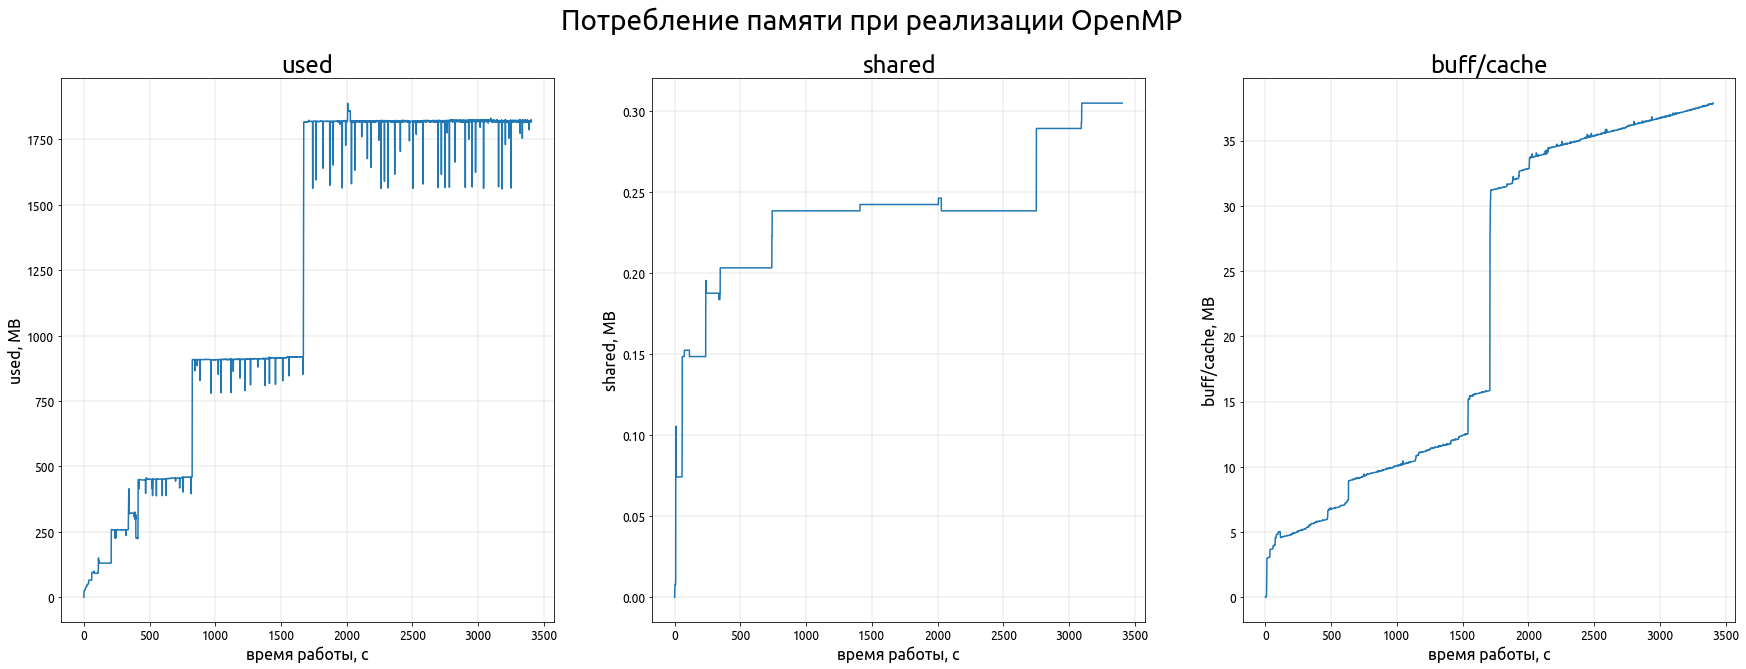

In [37]:
stats = ['used', 'shared', 'buff/cache']
plot_mem(openmp_mem, stats, 'OpenMP')

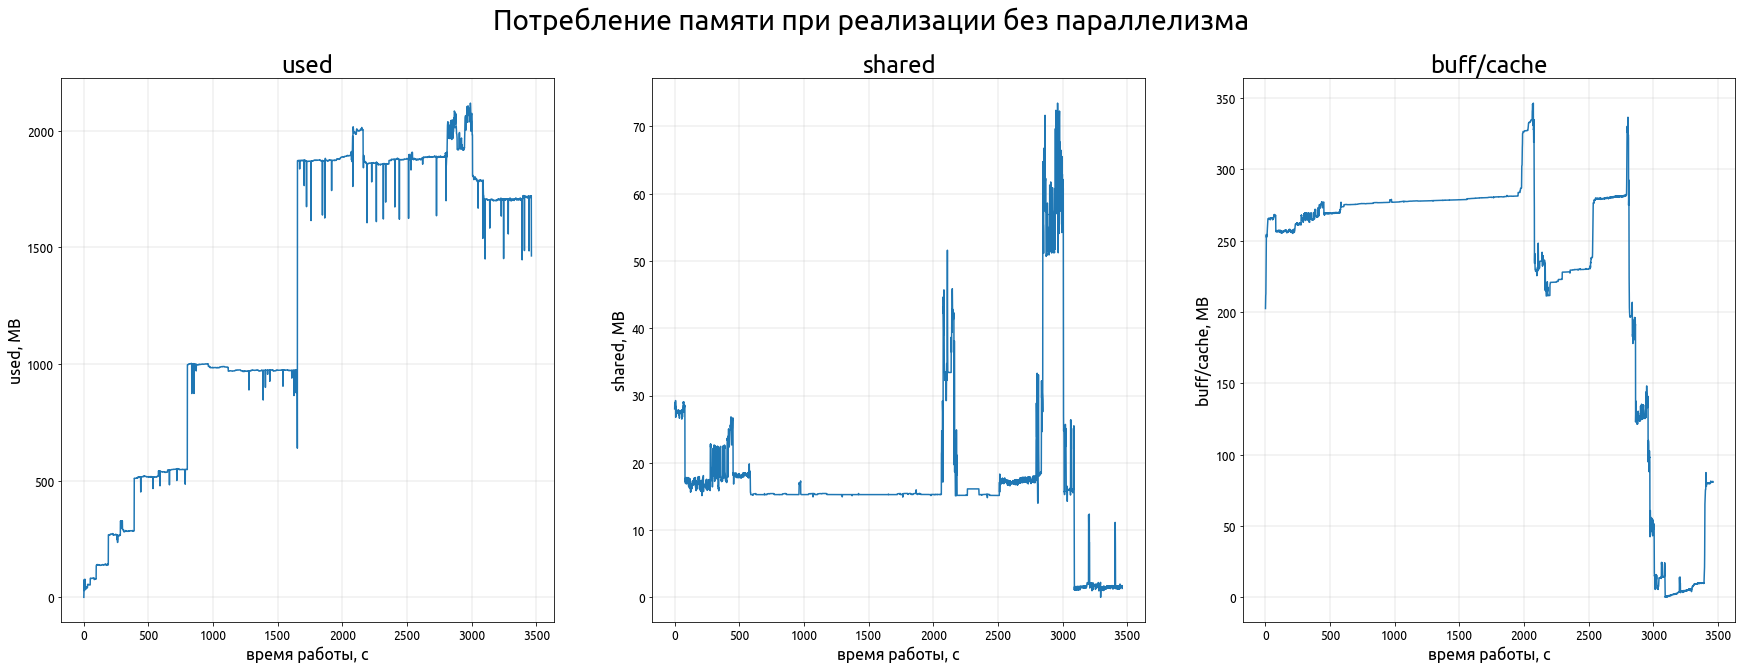

In [38]:
plot_mem(noopenmp_mem, stats, 'без параллелизма')

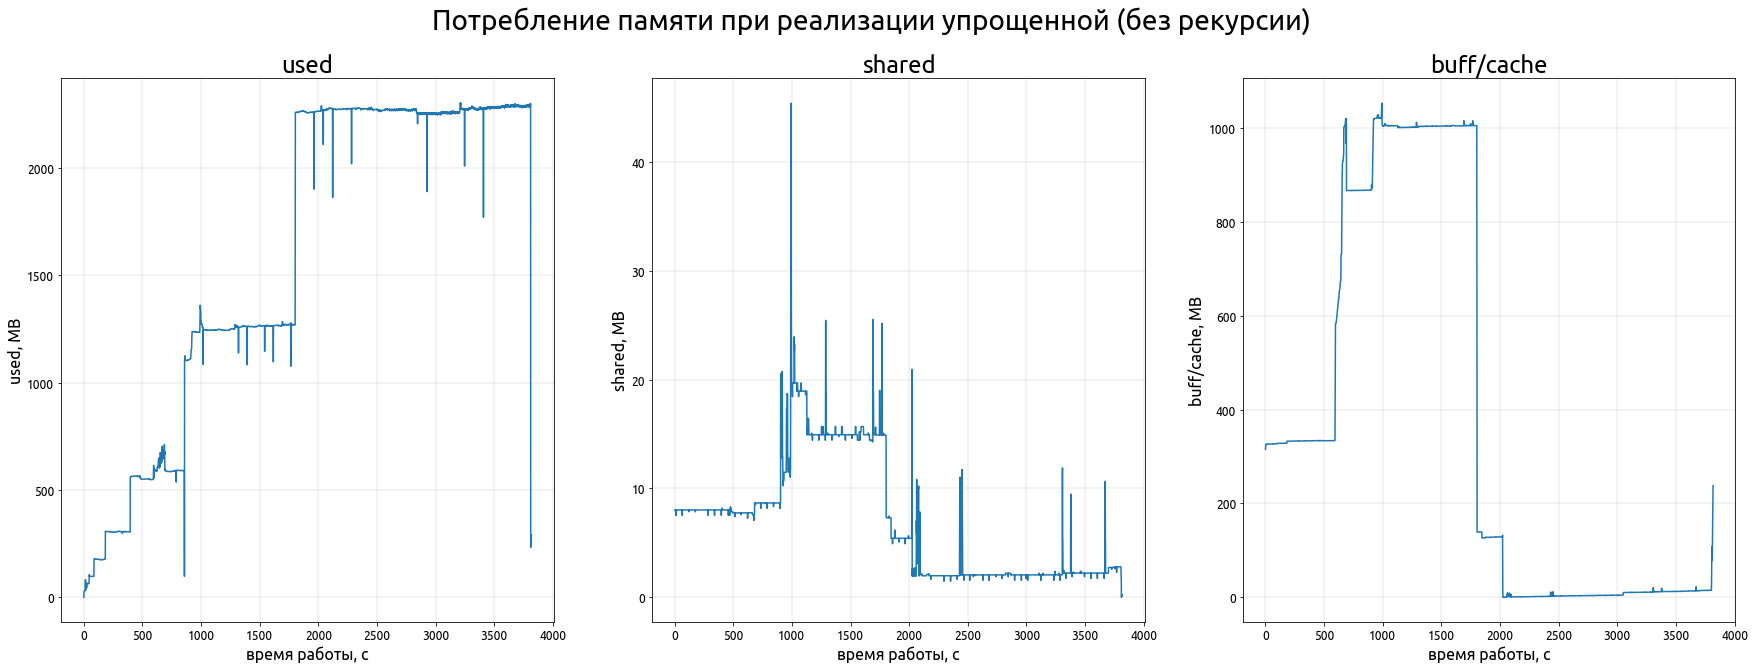

In [39]:
plot_mem(light_mem, stats, 'упрощенной (без рекурсии)')

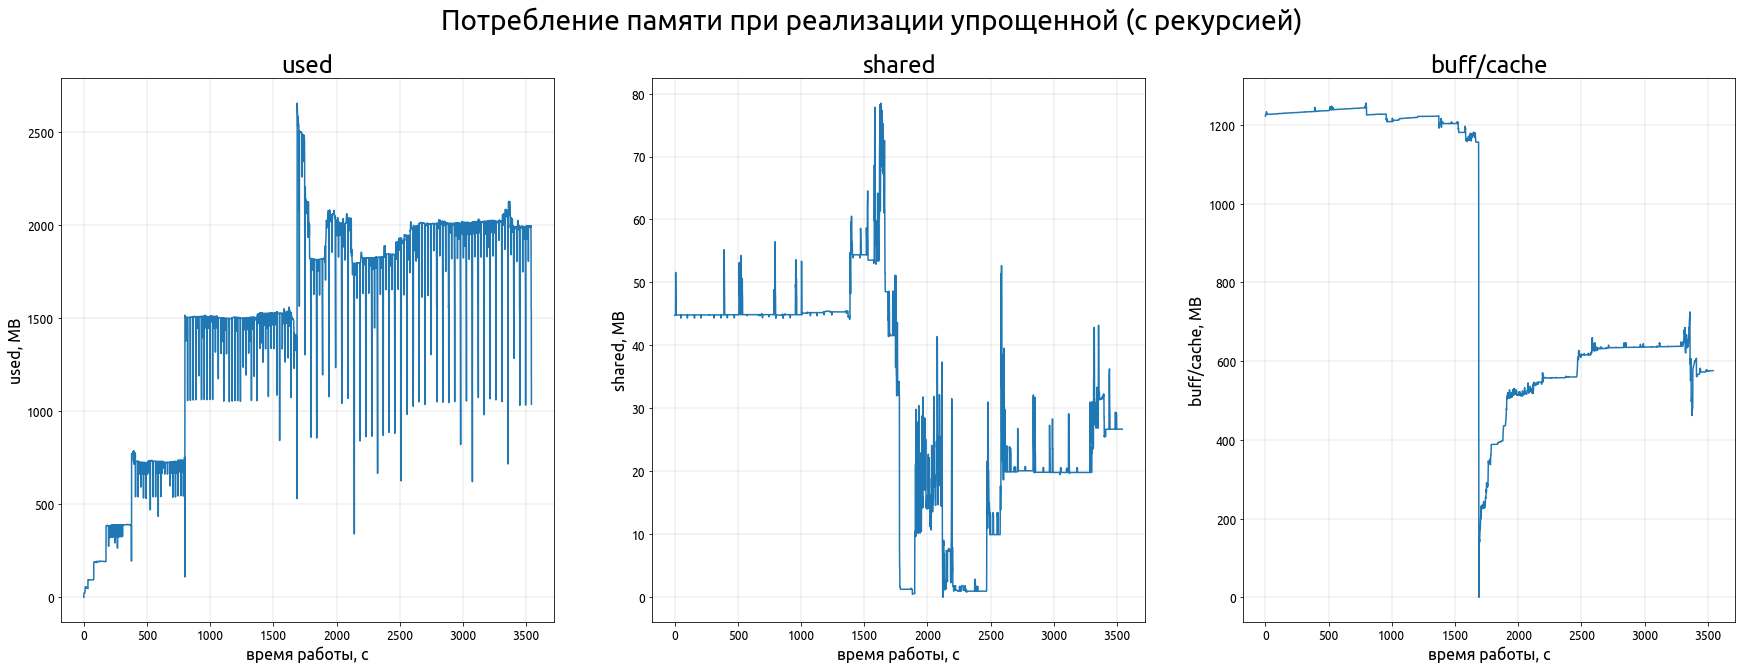

In [40]:
plot_mem(hard_mem, stats, 'упрощенной (с рекурсией)')